# 1.Google Collab Environment Setup

Please run this Google Colab Jupyter Notebook with the following settings under "Runtime" -> "Change runtime type".

Runtime type: Python 3

Hardware accelerator: T4 GPU

## 1.1 Setting up Python 3.8
This project uses Python 3.8 whilst Google Colab currently uses Python 3.10. Run the following commands to downgrade to Python 3.8.

Note: This process takes quite some time so you can leave it running in the background.

In [ ]:
# downgrade Python by reinstalling pip and distutils
!apt-get install python3.8 python3-pip python3.8-distutils
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 1

# check the result
!python3 --version

!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

# for .avi to .mp4
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3-setuptools python3-wheel
  python3.8-lib2to3 python3.8-minimal
Suggested packages:
  python-setuptools-doc python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3-pip python3-setuptools
  python3-wheel python3.8 python3.8-distutils python3.8-lib2to3 python3.8-minimal
0 upgraded, 11 newly installed, 0 to remove and 19 not upgraded.
Need to get 7,094 kB of archives.
After this operation, 29.1 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.18-1+jammy1 [794 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:3 https://ppa.launchp

##1.2 Clone the required repositories

In [ ]:
# clone FollowYourPose repository
!git clone https://github.com/mayuelala/FollowYourPose.git

# clone MMpose repository
!git clone https://github.com/open-mmlab/mmpose.git

# clone team 15's repository
!git clone https://github.com/ong-yi-xuan/ict3104-team15.git

Cloning into 'FollowYourPose'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 331 (delta 93), reused 77 (delta 74), pack-reused 228
Receiving objects: 100% (331/331), 277.89 MiB | 29.39 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Cloning into 'mmpose'...
remote: Enumerating objects: 30276, done.
remote: Counting objects: 100% (1052/1052), done.
remote: Compressing objects: 100% (524/524), done.
remote: Total 30276 (delta 538), reused 929 (delta 519), pack-reused 29224
Receiving objects: 100% (30276/30276), 52.76 MiB | 27.37 MiB/s, done.
Resolving deltas: 100% (21348/21348), done.
Cloning into 'ict3104-team15'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 224 (delta 36), reused 82 (delta 34), pack-reused 138
Receiving objects: 100% (224/224), 240.64 MiB | 13.65 MiB/s, d

## 1.3 Install and Import Required Dependencies

In [ ]:
# install required dependencies

# triton and torch
!python3 -m pip install -q $(grep -ivE "triton|torch|torchvision|xformers" FollowYourPose/requirements.txt) # Install all except those specified (outdated in the req file)
!python3 -m pip install -q triton==2.0.0 torch==2.0.1 torchvision imageio-ffmpeg xformers==0.0.21 --extra-index-url https://download.pytorch.org/whl/cu113

# libraries for UI
!python3 -m pip install ipywidgets
!python3 -m pip install tqdm

# gdown for downloading files from google drive
!python3 -m pip install gdown

# MMpose for skeleton extraction from input video
!python3 -m pip install -U openmim
!python3 -m mim install "mmengine==0.8.5"
!python3 -m mim install "mmcv==2.0.1"
!python3 -m mim install "mmpose==1.1.0"
!python3 -m pip install -r mmpose/requirements.txt
!python3 -m pip install -U bitsandbytes

# libraries for captions
!python3 -m pip install moviepy

# libraries for calculating FID
!python3 -m pip install scikit-learn
!python3 -m pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 30

In [ ]:
# importing other dependencies
import yaml
import gdown
import os
import ipywidgets as widgets
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output, HTML, Image, Video
from tqdm import tqdm
from moviepy.editor import VideoFileClip, TextClip, ImageClip, CompositeVideoClip, clips_array, vfx

# dependecies for calculating FID
from scipy.linalg import sqrtm
from scipy.stats import entropy
from sklearn.metrics import pairwise_distances
from skimage.transform import resize
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model

## 1.4 ImageMagick Installation and Setup

**This step is important for using MoviePy to generate the output videos**

Step 1:Install ImageMagick

In [ ]:
# install imagemagick
!apt update
!apt install imagemagick
!apt install ffmpeg

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
43 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
T

Step 2: Update ImageMagick policy to have read and write access

In [ ]:
# give ImageMagick read and write access
!cat /etc/ImageMagick-6/policy.xml | sed 's/none/read,write/g'> /etc/ImageMagick-6/policy.xml

Step 3: Change MoviePy settings to point to the ImageMagick binary in our filesystem

In [ ]:
import subprocess
from moviepy.config import change_settings

# get the path of the ImageMagick binary
imagemagick_path = subprocess.check_output(['which', 'convert']).strip().decode('utf-8')

# update MoviePy's settings with your ImageMagick binary path
change_settings({"IMAGEMAGICK_BINARY": imagemagick_path})

## 1.5 Download Necessary Code and MMPose Files

In [ ]:
# download txt2video file
txt2video_file_id = "19jT40m76ZPkF_zUVa66QGiBJP9UsSvjn"
url = 'https://drive.google.com/uc?id=' + txt2video_file_id
output = 'txt2video.py'  # Desired name of the downloaded file
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=19jT40m76ZPkF_zUVa66QGiBJP9UsSvjn
To: /content/txt2video.py
100%|██████████| 7.10k/7.10k [00:00<00:00, 9.06MB/s]


'txt2video.py'

In [ ]:
# download charades folder and files needed for training and mmpose
!gdown --id 19pWkMueUtEdRWnLVwkDhjKudjgrgSg2c
!unzip charades-dataset.zip
!gdown --id 13fAHmT_8wgK6gSdT1ysJkpQLDhzha_yZ
!gdown --id 1rUdYhsE8DJMk60VPK8CWixeKOQE4Oj2f
!gdown --id 13gmYdoQC3vKD0trkhZwjEDHsQBsg0Ge8

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=19pWkMueUtEdRWnLVwkDhjKudjgrgSg2c 

unzip:  cannot find or open charades-dataset.zip, charades-dataset.zip.zip or charades-dataset.zip.ZIP.
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13fAHmT_8wgK6gSdT1ysJkpQLDhzha_yZ
To: /content/charades-trimmed.csv
100% 1.30k/1.30k [00:00<00:00, 2.7

In [ ]:
# download mmpose_run.py from google drive
gdown.download("https://drive.google.com/file/d/1eWggN4hIghei-TN5cqpbNXHVyj7NrEk8/view", "mmpose_run.py",quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1eWggN4hIghei-TN5cqpbNXHVyj7NrEk8
To: /content/mmpose_run.py
100%|██████████| 6.97k/6.97k [00:00<00:00, 20.4MB/s]


'mmpose_run.py'

# 2. Data Exploration

R2. A Data Exploration section in the notebook that can load, list and display video data from the Charades project (will change the description later on, this is here to track that we're meeting all the requirements)

1. A data folder in the repo with subfolders that store input video files and other related input files for different types of datasets ✅
2. Choose a video file from the data folder through an appropriate UI component (e.g., dropdown menu) in a notebook code cell ✅
3. See video playback of the chosen video file in an output cell ✅  

R12. I should also be able to load the videos from another dataset, Sims4Action (https://github.com/aroitberg/sims4action). You can demo this on 1-2 videos from this dataset.

1. A dataset subfolder in the data folder that stores Sims4Actions videos ✅
2. Ability to convert Sims4Actions videos in .avi format to .mp4 format for compatibility with MMPose ✅
3. Choose a video file from the data folder through an appropriate UI component (e.g., dropdown menu) in a notebook code cell ✅
4. See video playback of the chosen video file in an output cell ✅

## 2.1 Obtaining the path to any required file

At many points of this notebook, you will be required to copy the path to the file that is required for that particular section. To obtain the path, simply navigate to the directory on the left column of this notebook and copy it as demonstrated in the picture below.


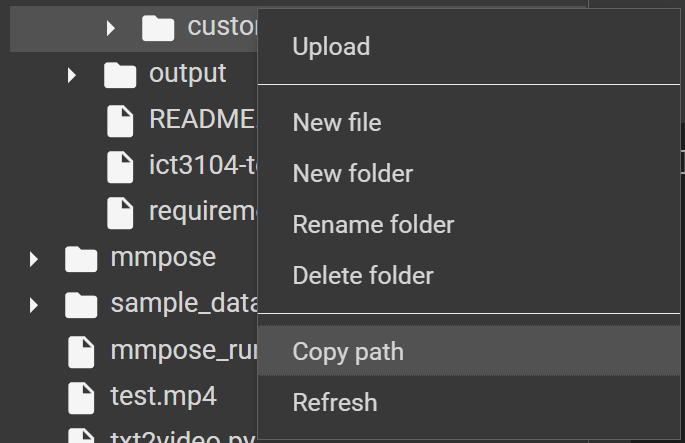

**IMPORTANT!** : To load in your custom videos, please save them in the "data" folder, where the Charades & Sims4Actions videos are located.

Furthermore, to play videos from the Sims4Actions dataset you are required to convert them from .avi format to .mp4. Otherwise, these videos cannot be used to obtain the skeleton through MMPose.

Play the cell below to convert videos from .avi to .mp4. If your custom videos are already in the .mp4 format, move to the next cell to learn how to play your videos.

In [ ]:
#@markdown Enter the path to the video you wish to convert
video_to_convert = "/content/ict3104-team15/data/Sims4Actions/Wa_S6L2_fC21.avi" #@param {type:"string"}

#@markdown Enter the name of the file you wish to save it as (make to sure append an .mp4 at the end)
file_name = "test_convert.mp4" #@param {type:"string"}

!ffmpeg -i "$video_to_convert" "/content/ict3104-team15/data/Sims4Actions/$file_name"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
main_directory = 'ict3104-team15/data'
folder_contents = os.listdir(main_directory)

folder_dropdown = widgets.Dropdown(
    options=folder_contents,
    description='Select a folder:',
)

mp4_dropdown = widgets.Dropdown(
    options=['Select a folder first'],
    description='Select an .mp4 file:',
    disabled=True,
)

button = widgets.Button(description="Play .mp4 File")
output = widgets.Output()

# Function to update the .mp4 dropdown based on the selected folder
def update_mp4_dropdown(change):
    selected_folder = change.new
    selected_directory = os.path.join(main_directory, selected_folder)

    if os.path.isdir(selected_directory):
        mp4_files = [f for f in os.listdir(selected_directory) if f.lower().endswith('.mp4')]
        mp4_dropdown.options = mp4_files
        mp4_dropdown.disabled = False
    else:
        mp4_dropdown.options = ['Select a folder first']
        mp4_dropdown.disabled = True

# Function to play the selected .mp4 file
def play_mp4_file(_):
    selected_mp4 = mp4_dropdown.value
    selected_folder = folder_dropdown.value
    selected_directory = os.path.join(main_directory, selected_folder)
    save_path = os.path.join(selected_directory, selected_mp4)

    if selected_mp4.lower().endswith('.mp4'):
        with output:
            clear_output(wait=True)
            display(Video(save_path, embed=True))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .mp4 file.")

folder_dropdown.observe(update_mp4_dropdown, names='value')
button.on_click(play_mp4_file)

display(folder_dropdown)
display(mp4_dropdown)
display(button)
display(output)


Dropdown(description='Select a folder:', options=('Sims4Actions', 'charades'), value='Sims4Actions')

Dropdown(description='Select an .mp4 file:', disabled=True, options=('Select a folder first',), value='Select …

Button(description='Play .mp4 File', style=ButtonStyle())

Output()

# 3. Inference
R3. An Inference section in the notebook that can perform inference using a pretrained genAI model based on the Charades project.  

1. Load a pretrained model using an appropriate UI component ✅
2. Have appropriate UI components to let the user choose an input video from the Charades project, and write in a text prompt as input into the genAI model. ✅
3. See inference results in the form of output videos with captions that depict the action/activity. ✅

## 3.0.1 Generate skeleton from input video
The code block below allows the user to point to a path after
```
--input <insert path to video here>
```
to extract a skeleton using the mmpose library. It outputs to a folder called "skeleton_results" in the root of the repository. The other arguments ***SHOULD NOT*** be touched.



In [ ]:
# Ensure mmpose and deps are installed
!python3 -m mim list

Package    Version    Source
---------  ---------  -----------------------------------------
mmcv       2.0.1      https://github.com/open-mmlab/mmcv
mmdet      3.1.0      https://github.com/open-mmlab/mmdetection
mmengine   0.8.5      https://github.com/open-mmlab/mmengine
mmpose     1.1.0      https://github.com/open-mmlab/mmpose


In [ ]:
# Command to generate skeleton

# replace after --input the path after

!python3 mmpose_run.py \
    mmpose/configs/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512.py \
    https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth \
    --input /content/ict3104-team15/data/charades/6QW3Y.mp4 --output-root=skeleton_results

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth" to /root/.cache/torch/hub/checkpoints/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth
100% 352M/352M [01:49<00:00, 3.37MB/s]
/usr/local/lib/python3.8/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwa

## 3.1. Create a folder to store models

In [ ]:
%mkdir checkpoints
!git lfs install

Git LFS initialized.


## 3.2. Download or select pre-trained model
**To select the model, change the inputs as desired and run the cell again**

In [ ]:
#@markdown A FollowYourPose model will be downloaded from a remote repo by default

#@markdown Untick the checkbox below if you want to use a pretrained model in your local directory, otherwise you may run the cell

download_pretrained_model = True  #@param {type:"boolean"}

if download_pretrained_model:
    MODEL_NAME = "YueMafighting/FollowYourPose_v1"
    SAVE_LOCATION = f"./checkpoints/"
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/
    print(f"[*] Model saved successfully in {SAVE_LOCATION}")
    selected_folder = "stable-diffusion-v1-4"
else:
    #@markdown If you have a local model, enter the path to the folder:
    local_model_path = "stable-diffusion-v1-4" #@param {type:"string"}

    # since we haven't started on training, i'm pointing to the stable-diffusion folder that contains
    # the configs for the pretrained models. will change this once we know which folder is generated during training.
    if os.path.exists(local_model_path):
        selected_folder = local_model_path
        print(f"[*] Folder selected: {selected_folder}")
    else:
        print("The specified local folder does not exist. Please provide a valid path.")


Cloning into 'checkpoints'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), 584.62 KiB | 2.06 MiB/s, done.
Filtering content: 100% (9/9), 9.75 GiB | 41.26 MiB/s, done.
[*] Model saved successfully in ./checkpoints/


## 3.3. Set Inference Configuration Settings



### 3.3.1 Configuration Settings
The code below saves user defined configuration settings into a configuration file for running inference.
<br><br>

**Make sure to run the previous code blocks in sections 3.1 & 3.2 to ensure that you have selected the pretrained model.**
<br><br>

You can also modify the video settings in the "Default video settings" section on the right.
<br><br>
**IMPORTANT**: When using Google Colab, the maximum video length should be 8 due to the lack of resources.

<br>

**To save the config file, change the inputs as desired and run the cell again**

In [ ]:
#@markdown Inference: Config for generating videos
config_file_name = "pose_test.yaml" #@param {type:"string"}
pretrained_model_path = "./checkpoints/" + selected_folder
video_output_dir = "ict3104-team15/output/gif_results" #@param {type:"string"}

#@markdown <br> Prompts for inference. Please separate multiple prompts using a comma.
prompts_list = "Ironman on the moon, Stormtrooper at the beach" #@param {type:"string"}
prompts_split = [prompt.strip() for prompt in prompts_list.split(',')]

# checkpoint config
resume_from_checkpoint = "./checkpoints/followyourpose_checkpoint-1000"
# There is no need for us to generate checkpoints during training, so it will always use the default folder.

#@markdown <br> Default video settings
# seed for reproducibility
seed = 33 #@param {type:"integer"}

# video config settings
video_length = 8 #@param {type:"integer"}
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# inference config settings
num_inference_steps = 8 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
use_inv_latent = False #@param {type:"boolean"}
num_inv_steps = 50 #@param {type:"number"}
dataset_set = "val" #@param {type:"string"}

train_batch_size = 1
validation_steps = 100
mixed_precision = 'no'
gradient_checkpointing = False
enable_xformers_memory_efficient_attention = True

# save as config file
config_dir = "FollowYourPose/configs"

# save each config item into dictionary
config_dict = {
  'pretrained_model_path': pretrained_model_path,
  'output_dir': video_output_dir,
  'validation_data':
    {
      'prompts': prompts_split,
      'video_length': video_length,
      'width': video_width,
      'height': video_height,
      'num_inference_steps': num_inference_steps,
      'guidance_scale': guidance_scale,
      'use_inv_latent': use_inv_latent,
      'num_inv_steps': num_inv_steps,
      'dataset_set': dataset_set,
    },
  'train_batch_size': train_batch_size,
  'validation_steps': validation_steps,
  'resume_from_checkpoint': resume_from_checkpoint,
  'seed': seed,
  'mixed_precision': mixed_precision,
  'gradient_checkpointing': gradient_checkpointing,
  'enable_xformers_memory_efficient_attention': enable_xformers_memory_efficient_attention
}

# save dictionary as config yaml file
config_file = config_dir + '/' + config_file_name
with open(config_file, 'w') as file:
  yaml.dump(config_dict, file, sort_keys=False)

print("Config file saved as " + config_file)


Config file saved as FollowYourPose/configs/pose_test.yaml


## 3.4. Generate Content

**Important Note: Make sure you have run through the setup for ImageMagick as stated in Section 1.4 or the captioned and qualitative analysis videos cannot be generated**


### 3.4.1 Basic Inference

To generate the inference outputs files, change the file paths as desired and run the cell again

Note: When running on Google Colab, the output might be truncated so there is no visual indicator of the inference process. Please check the output folderfor your output files after the cell has finished running

In [ ]:
#@markdown **Run inference to generate videos**
config_file = "FollowYourPose/configs/pose_test.yaml" #@param {type:"string"}
MMPOSE_skeleton_file = "FollowYourPose/pose_example/vis_ikun_pose2.mov" #@param {type:"string"}

!accelerate launch txt2video.py --config={config_file}  --skeleton_path={MMPOSE_skeleton_file}

[02:43:54] WARNING  The following values were not passed to `accelerate launch` and   ]8;id=921190;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=143207;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py#1077\1077]8;;\
                    had defaults used instead:                                                      
                            `--num_processes` was set to a value of `1`                             
                            `--num_machines` was set to a value of `1`                              
                            `--mixed_precision` was set to a value of `'no'`                        
                            `--dynamo_backend` was set to a value of `'no'`                         
                    To avoid this warning pass in values for each of the problematic                
                    parameters or run `accelerate config`.                                  

### 3.4.2 Generate Videos with Captions

Using the basic inference videos generated above, the code below outputs into {output_dir}/captions:
- individual captioned videos
- a combined video that shows the original mmpose video side by side with all the captioned videos

In [ ]:
#@markdown **Generate captions for the inference output videos**
input_dir = "ict3104-team15/output/gif_results/individual" #@param {type:"string"}
output_dir = "ict3104-team15/output/gif_results/captions" #@param {type:"string"}
MMPOSE_skeleton_file = "FollowYourPose/pose_example/vis_ikun_pose2.mov" #@param {type:"string"}

#@markdown video config settings (this should be the same as in inference)
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# list to store all captioned clips
captioned_clips = []

# add captions to all gifs inside the input folder
for filename in os.listdir(input_dir):
  if filename.endswith(".gif"):
    gif_path = os.path.join(input_dir, filename)
    prompt = filename[:-4]  # remove the ".gif" extension from filename

    gif_clip = VideoFileClip(gif_path) # load in gif file

    # create caption using prompt
    text_clip = TextClip(prompt, fontsize=40, color='white', bg_color='black') # create a text clip with text, fontsize, and color
    text_clip = text_clip.set_position(('center', 'bottom')) # position the text clip
    text_clip = text_clip.set_duration(gif_clip.duration)

    # output individual captioned gif files
    gif_with_text = CompositeVideoClip([gif_clip, text_clip]) # overlay text on video
    output_path = os.path.join(output_dir, f"captioned {prompt}.gif")
    gif_with_text.write_gif(output_path, fps=15)

    captioned_clips.append(gif_with_text)

# extract the duration of one of the captioned clips
video_length = captioned_clips[0].duration

# load mmpose clip and add into start of clips array
mmpose_clip = VideoFileClip(MMPOSE_skeleton_file).resize((video_width, video_height)) # resize mmpose video
mmpose_clip = mmpose_clip.subclip(0, video_length)  # shorten mmpose video to same length as inference gifs
captioned_clips.insert(0, mmpose_clip)

# create a combined gif file for mmpose vid and captioned vids side by side
final_clip = clips_array([captioned_clips], bg_color=(255, 255, 255))
output_path = os.path.join(output_dir, "captioned combined vid.gif")
final_clip.write_gif(output_path, fps=15)

print("All clips generated successfully!")

MoviePy - Building file ict3104-team15/output/gif_results/captions/captioned Ironman on the moon.gif with imageio.


MoviePy - Building file ict3104-team15/output/gif_results/captions/captioned Stormtrooper at the beach.gif with imageio.


MoviePy - Building file ict3104-team15/output/gif_results/captions/captioned combined vid.gif with imageio.


All clips generated successfully!


### 3.4.3 Content with MMPose Skeleton Overlay
Clips that will be skipped **must contain the skip_vid_keyword** (default: "combine") so that they are not generated in the output

For example, "captioned combined vid.gif" containing the MMPose skeleton side by side inference prompts with captions will be skipped

In [ ]:
#@markdown **Overlay MMPose skeleton over inference videos**
#@markdown <br> Input settings
input_dir = "ict3104-team15/output/gif_results/captions" #@param {type:"string"}
MMPOSE_skeleton_file = "FollowYourPose/pose_example/vis_ikun_pose2.mov" #@param {type:"string"}
skip_vid_keyword = "combine" #@param {type:"string"}

#@markdown Output settings
output_dir = "ict3104-team15/output/gif_results/overlay" #@param {type:"string"}
output_vid_name = "overlay.gif" #@param {type:"string"}

#@markdown video config settings (this should be the same as in inference)
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# list to store all captioned clips
all_clips = []

# load mmpose clip and set its overlay position
mmpose_clip = VideoFileClip(MMPOSE_skeleton_file).resize((video_width, video_height)) # resize mmpose video
transparent_mmpose_clip = mmpose_clip.fx(vfx.mask_color, color=(0, 0, 0), thr=30)  # remove black colour background  from mmpose clip
overlay_position = ("center", "center")

# add captions to all gifs inside the input folder
for filename in os.listdir(input_dir):
  if filename.endswith(".gif") and skip_vid_keyword not in filename.lower():
    gif_path = os.path.join(input_dir, filename)
    prompt = filename[:-4]  # remove the ".gif" extension from filename

    gif_clip = VideoFileClip(gif_path) # load in gif file

    gif_frame_rate = gif_clip.fps # get the frame rate

    # overlay mmpose clip on selected gif
    overlay_clip = CompositeVideoClip([gif_clip, transparent_mmpose_clip.set_pos("center").set_duration(gif_clip.duration)])
    overlay_clip = overlay_clip.set_duration(gif_clip.duration).set_fps(gif_frame_rate)  # set the frame rate
    all_clips.append(overlay_clip)

# extract the duration of one of the captioned clips
video_length = all_clips[0].duration

# insert mmpose vid into all_clips
mmpose_clip = mmpose_clip.subclip(0, video_length)  # shorten mmpose video to the same length as inference gifs
all_clips.insert(0, mmpose_clip)

final_clip = clips_array([all_clips])
output_path = os.path.join(output_dir, output_vid_name)
final_clip.write_gif(output_path, fps=gif_frame_rate)

print("All clips generated successfully!")

MoviePy - Building file ict3104-team15/output/gif_results/overlay/overlay.gif with imageio.


All clips generated successfully!


## 3.5. Playing the Generated Content

Select the desired file and play the generated gifs.

In [ ]:
gif_output_directory = 'ict3104-team15/output/gif_results/overlay'

folder_contents = os.listdir(gif_output_directory)

gif_files = [file for file in folder_contents if file.lower().endswith('.gif')]

gif_dropdown = widgets.Dropdown(
    options=gif_files,
    description='Select a .gif file:',
    disabled=False,
)

button = widgets.Button(description="Play .gif File")
output = widgets.Output()

# Function to play the selected .gif file
def play_gif_file(_):
    selected_gif = gif_dropdown.value
    save_path = os.path.join(gif_output_directory, selected_gif)

    if selected_gif.lower().endswith('.gif'):
        with output:
            clear_output(wait=True)
            display(Image(open(save_path, 'rb').read(), format='png'))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .gif file.")

button.on_click(play_gif_file)

display(gif_dropdown)
display(button)
display(output)


FileNotFoundError: ignored

## 3.6. Exit and free runtime memory

In [ ]:
exit()

# 4. Training
R4. A Training section in the notebook that can train a new genAI model based on the Charades project.
1. Choose a dataset subfolder, using appropriate UI elements, from the data folder to use for the training ✅
2. ~Initialize a model (to be trained) with a network architecture configured in a separate .py file~ --> no longer needed
3. Specify a name for this new model using appropriate UI elements. ✅
4. ~Set the batch_size and epochs, with appropriate UI elements, prior to running a training sequence~ --> no longer needed
5. Run the training sequence, i.e., fit the model onto the dataset
6. See some visual elements to indicate the progress of the training in the notebook ✅
7. After training is complete, the trained model should be added to the list of pre-trained models that can be chosen in R3. You will only need to keep the best model from that particular training run, and can delete the rest. Models from other configs should not be deleted.
8. You will need to store each pretrained model in a designated folder, to be used for R3.
9. You would need to have a way for users to cycle through each video in the folder to do the Training step (fine-tuning part) on multiple videos consecutively
10. You will likely need to dissect the train_followyourpose.py and configs//pose_sample.yaml file from https://github.com/mayuelala/FollowYourPose

In [ ]:
#@markdown A FollowYourPose model will be downloaded from a remote repo by default

#@markdown Untick the checkbox below if you want to use a pretrained model in your local directory, otherwise you may run the cell

download_pretrained_model = True  #@param {type:"boolean"}

if download_pretrained_model:
    MODEL_NAME = "YueMafighting/FollowYourPose_v1"
    SAVE_LOCATION = f"./checkpoints/"
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/
    print(f"[*] Model saved successfully in {SAVE_LOCATION}")
    selected_folder = "stable-diffusion-v1-4"
else:
    #@markdown If you have a local model, enter the path to the folder:
    local_model_path = "stable-diffusion-v1-4" #@param {type:"string"}

    # since we haven't started on training, i'm pointing to the stable-diffusion folder that contains
    # the configs for the pretrained models. will change this once we know which folder is generated during training.
    if os.path.exists(local_model_path):
        selected_folder = local_model_path
        print(f"[*] Folder selected: {selected_folder}")
    else:
        print("The specified local folder does not exist. Please provide a valid path.")

Training Progress: 100%|██████████| 100/100 [00:10<00:00,  9.87it/s]


Similar to the Inference process, the inputs on the right are for modify the configuration settings used in the Training process.

**! IMPORTANT**: Make sure to run the code block again to save the changes made to the configuration file.

In [ ]:
#@markdown Inference: Config for generating videos
config_file_name = "charades_train.yaml" #@param {type:"string"}
pretrained_model_path = "./checkpoints/" + selected_folder
video_output_dir = "content/output/gif_results" #@param {type:"string"}

#@markdown <br> Prompts for inference. Please separate multiple prompts using a comma.
prompts_list = "Ironman on the moon, Stormtrooper at the beach" #@param {type:"string"}
prompts_split = [prompt.strip() for prompt in prompts_list.split(',')]

# checkpoint config
resume_from_checkpoint = "./checkpoints/followyourpose_checkpoint-1000"
# There is no need for us to generate checkpoints during training, so it will always use the default folder.

#@markdown <br> Default video settings
# seed for reproducibility
seed = 33 #@param {type:"integer"}

# video config settings
video_length = 1 #@param {type:"integer"}
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# inference config settings
num_inference_steps = 1 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
use_inv_latent = False #@param {type:"boolean"}
num_inv_steps = 50 #@param {type:"number"}

n_sample_frames = 4 #@param {type:"number"}
train_batch_size = 1 #@param {type:"number"}
max_train_steps = 1 #@param {type:"number"}
checkpointing_steps = 1 #@param {type:"number"}
validation_steps = 10 #@param {type:"number"}
skeleton_path = '/content/skeleton_results/test.gif' #@param {type:"string"}
mixed_precision = 'no' #@param {type:"string"}
use_8bit_adam = False #@param {type:"boolean"}
gradient_checkpointing = True #@param {type:"boolean"}
enable_xformers_memory_efficient_attention = True #@param {type:"boolean"}

# save as config file
config_dir = "/content"

# save each config item into dictionary
config_dict = {
  'pretrained_model_path': pretrained_model_path,
  'output_dir': video_output_dir,
  'train_data':
    {
      'video_path': prompts_split,
      'prompt': video_length,
      'n_sample_frames': n_sample_frames,
      'width': video_width,
      'height': video_height,
      'sample_start_idx': 0,
      'sample_frame_rate': 4,
      'dataset_set': "train",
    },
  'validation_data':
    {
      'prompts': prompts_split,
      'video_length': video_length,
      'width': video_width,
      'height': video_height,
      'num_inference_steps': num_inference_steps,
      'guidance_scale': guidance_scale,
      'use_inv_latent': use_inv_latent,
      'num_inv_steps': num_inv_steps,
      'dataset_set': "val",
    },

  'learning_rate': 3e-5,
  'train_batch_size': train_batch_size,
  'max_train_steps': max_train_steps,
  'checkpointing_steps': checkpointing_steps,
  'validation_steps': validation_steps,
  'trainable_modules': ["attn1.to_q", "attn2.to_q" ,"attn_temp" ,"conv_temporal"],
  'skeleton_path': skeleton_path,
  'resume_from_checkpoint': resume_from_checkpoint,
  'seed': seed,
  'mixed_precision': mixed_precision,
  'use_8bit_adam': use_8bit_adam,
  'gradient_checkpointing': gradient_checkpointing,
  'enable_xformers_memory_efficient_attention': enable_xformers_memory_efficient_attention
}

# save dictionary as config yaml file
config_file = config_dir + '/' + config_file_name
with open(config_file, 'w') as file:
  yaml.dump(config_dict, file, sort_keys=False)

print("Config file saved as " + config_file)


Config file saved as /content/charades_train.yaml


In [ ]:
!TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch \
    FollowYourPose/train_followyourpose.py \
    --config="FollowYourPose/configs/pose_train.yaml"

[18:56:18] WARNING  The following values were not passed to `accelerate launch` and   ]8;id=875877;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=504857;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py#1077\1077]8;;\
                    had defaults used instead:                                                      
                            `--num_processes` was set to a value of `1`                             
                            `--num_machines` was set to a value of `1`                              
                            `--mixed_precision` was set to a value of `'no'`                        
                            `--dynamo_backend` was set to a value of `'no'`                         
                    To avoid this warning pass in values for each of the problematic                
                    parameters or run `accelerate config`.                                  

# 5. Testing
R5. A Testing section in the notebook that will evaluate a trained model based on the Charades project.

R11. Able to view some form of metrics to gauge the resultant video performance e.g FID (Fretchet Inception Distance).

1. Choose a dataset subfolder, using appropriate UI elements, from the data folder to use for testing ✅
2. Load a pretrained model using an appropriate UI component ✅
3. Break down the skeleton and output videos into frames to use in calculating the FID performance
4. Calculate and perform a comparison across frames from the same video
5. See some visual elements to indicate the progress of testing in the notebook  ✅
6. Visualise the FID performance on a graph for easier analysis
7. Have a way to save the results to a results folder in the repo  

## 5.1 Performing inference before testing

To calculate the FID performance of the output video compared to the Charades/Sims4Actions dataset, you will have to generate the raw output gif.

As Section 3 of this notebook performs the Inference with the skeleton superimposed, the input pose side by side with the output video, and with captions, you will have to perform the Inference again.


### 5.1.1 Configuration Settings

**IMPORTANT!!!** Although similar to section 3, make sure to run this codeblock to edit the config file again.

**To save the config file, change the inputs as desired and run the cell again**

In [ ]:
#@markdown Inference: Config for generating videos
config_file_name = "pose_test.yaml" #@param {type:"string"}
pretrained_model_path = "./checkpoints/" + selected_folder
video_output_dir = "gif_results" #@param {type:"string"}

#@markdown <br> Prompts for inference. Please separate multiple prompts using a comma.
prompts_list = "shrek going down the stairs" #@param {type:"string"}
prompts_split = [prompt.strip() for prompt in prompts_list.split(',')]

# checkpoint config
resume_from_checkpoint = "./checkpoints/followyourpose_checkpoint-1000"
# There is no need for us to generate checkpoints during training, so it will always use the default folder.

#@markdown <br> Default video settings
# seed for reproducibility
seed = 33 #@param {type:"integer"}

# video config settings
video_length = 8 #@param {type:"integer"}
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# inference config settings
num_inference_steps = 8 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
use_inv_latent = False #@param {type:"boolean"}
num_inv_steps = 50 #@param {type:"number"}
dataset_set = "val" #@param {type:"string"}

train_batch_size = 1
validation_steps = 100
mixed_precision = 'no'
gradient_checkpointing = False
enable_xformers_memory_efficient_attention = True

# save as config file
config_dir = "FollowYourPose/configs"

# save each config item into dictionary
config_dict = {
  'pretrained_model_path': pretrained_model_path,
  'output_dir': video_output_dir,
  'validation_data':
    {
      'prompts': prompts_split,
      'video_length': video_length,
      'width': video_width,
      'height': video_height,
      'num_inference_steps': num_inference_steps,
      'guidance_scale': guidance_scale,
      'use_inv_latent': use_inv_latent,
      'num_inv_steps': num_inv_steps,
      'dataset_set': dataset_set,
    },
  'train_batch_size': train_batch_size,
  'validation_steps': validation_steps,
  'resume_from_checkpoint': resume_from_checkpoint,
  'seed': seed,
  'mixed_precision': mixed_precision,
  'gradient_checkpointing': gradient_checkpointing,
  'enable_xformers_memory_efficient_attention': enable_xformers_memory_efficient_attention
}

# save dictionary as config yaml file
config_file = config_dir + '/' + config_file_name
with open(config_file, 'w') as file:
  yaml.dump(config_dict, file, sort_keys=False)

print("Config file saved as " + config_file)

Config file saved as FollowYourPose/configs/pose_test.yaml


### 5.1.2 Generate output

Once again with the same instructions as before, make sure to run this code block as well to generate the output with no superimposed skeleton, caption, or side by side comparison.

**To generate the inference outputs files, change the file paths as desired and run the cell again**

Note: When running on Google Colab, the output might be truncated so there is no visual indicator of the inference process. Please check the output folder (default: gif_results/inference) for your output files after the cell has finished running

In [ ]:
config_file = "FollowYourPose/configs/pose_test.yaml" #@param {type:"string"}
MMPOSE_skeleton_file = "/content/skeleton_results/6QW3Y.mp4" #@param {type:"string"}

!accelerate launch txt2video.py --config={config_file}  --skeleton_path={MMPOSE_skeleton_file}

2023-11-07 16:29:19.221903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[16:29:21] WARNING  The following values were not passed to `accelerate launch` and   ]8;id=15482;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=14096;file:///usr/local/lib/python3.8/dist-packages/accelerate/commands/launch.py#1077\1077]8;;\
                    had defaults used instead:                                                      
                            `--num_processes` was set to a value of `1`                             
                            `--num_machines` was set to a value of `1`                              
                            `--mixed_precision` was set to a value of `'no'`                        
                            `--dynamo_backend` was set to a value of `'no'`                         
                    To avoid this warning pass in values for each of th

## 5.2 Selecting dataset and breaking down the selected gif file into frames
Now, insert the paths to your dataset video used to generate the MMPose Skeleton and the output gif in section 5.1.

In [ ]:
#@markdown Paste the path to your input video (Video used to generate the MMPose Skeleton)
input_path = "/content/ict3104-team15/data/charades/6QW3Y.mp4" #@param {type:"string"}

#@markdown Paste the path to your output file (Output gif generated from inference)
output_path = "/content/gif_results/individual/shrek going down the stairs.gif" #@param {type:"string"}

# Load your input and output file
input_clip = VideoFileClip(input_path)
output_clip = VideoFileClip(output_path)

#@markdown Make sure the output directory for input frames exists
input_dir = 'gif_results/performance/inputframes' #@param {type:"string"}
if not os.path.exists(input_dir):
    os.makedirs(input_dir)

#@markdown Make sure the output directory for output frames exists
output_dir = 'gif_results/performance/outputframes' #@param {type:"string"}
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Extract each frame
for i, frame in enumerate(input_clip.iter_frames()):
    # The frame is a numpy array, we can save it with moviepy
    frame_img = ImageClip(frame)
    frame_img.save_frame(f"{input_dir}/input_frame_{i+1:03d}.png")

# Extract each frame
for i, frame in enumerate(output_clip.iter_frames()):
    # The frame is a numpy array, we can save it with moviepy
    frame_img = ImageClip(frame)
    frame_img.save_frame(f"{output_dir}/output_frame_{i+1:03d}.png")

print(f"All input frames are extracted to {input_dir}")
print(f"All output frames are extracted to {output_dir}")

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+



All input frames are extracted to gif_results/performance/inputframes
All output frames are extracted to gif_results/performance/outputframes


## 5.3 Calculating the FID performance of the frames
Using the frames broken down previously, this portion of code will calculate the FID scores of each matching frame index. If either one of the input or output file is longer than the other, it will not be taken into account for the final score.

In [ ]:
# Function to calculate FID between two sets of features
def calculate_fid(act1, act2):
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    # Ensure that sigma1 and sigma2 are 2D matrices
    if sigma1.ndim == 0:
        sigma1 = sigma1.reshape(1, 1)
    if sigma2.ndim == 0:
        sigma2 = sigma2.reshape(1, 1)

    # Calculate the sum of squared differences between means
    ssdiff = np.sum((mu1 - mu2) ** 2)

    # Calculate the product of covariance matrices
    covmean = sqrtm(sigma1 @ sigma2)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    # Calculate the trace of the product
    fvd = ssdiff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fvd

# Load the InceptionV3 model without the top classification layer
base_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Calculate the number of frames for input and output clips
num_frames_input = int(input_clip.duration * input_clip.fps)
num_frames_output = int(output_clip.duration * output_clip.fps)

# Ensure an equal number of frames
num_frames = min(num_frames_input, num_frames_output)

# Initialize a list to store individual FID scores for each frame comparison
fid_scores = []

for i in range(num_frames):
    input_frame = input_clip.get_frame(i * input_clip.duration / num_frames)
    output_frame = output_clip.get_frame(i * output_clip.duration / num_frames)

    # Preprocess and resize frames for InceptionV3
    input_frame = resize(input_frame, (299, 299), preserve_range=True).astype(np.uint8)
    output_frame = resize(output_frame, (299, 299), preserve_range=True).astype(np.uint8)

    input_frame = preprocess_input(input_frame)
    output_frame = preprocess_input(output_frame)

    # Get features from InceptionV3 model
    input_feature = base_model.predict(np.expand_dims(input_frame, axis=0))
    output_feature = base_model.predict(np.expand_dims(output_frame, axis=0))

    # Calculate the FID score for this frame comparison
    fid_score = calculate_fid(input_feature, output_feature)
    fid_scores.append(fid_score)

# Print individual FID scores for each frame comparison
for i, score in enumerate(fid_scores):
    print(f"Frame {i + 1} FID Score: {score}")

1/1 [==============================] - 0s 43ms/step
Frame 1 FID Score: 592.5898788445838
Frame 2 FID Score: 555.9561553740475
Frame 3 FID Score: 532.0223397087047
Frame 4 FID Score: 548.4058748836371
Frame 5 FID Score: 475.31766421217003
Frame 6 FID Score: 381.1142227526916
Frame 7 FID Score: 453.9611048700122
Frame 8 FID Score: 482.3612010000901
Frame 9 FID Score: 538.5535123051402
Frame 10 FID Score: 556.0404057668513
Frame 11 FID Score: 530.2370159389228
Frame 12 FID Score: 579.8805170757554
Frame 13 FID Score: 583.801426108687
Frame 14 FID Score: 579.154017846743
Frame 15 FID Score: 623.7751407474486
Frame 16 FID Score: 671.5012943732698
Frame 17 FID Score: 689.2607492029316
Frame 18 FID Score: 613.2288735682041
Frame 19 FID Score: 600.6760538955842
Frame 20 FID Score: 677.5404951643419
Frame 21 FID Score: 597.4456836306139


## 5.4 Visualising the FID performance
Both the input dataset video and output gif will be compared (frame by frame, where applicable) to measure the FID scores of the Inference process.

Lower scores indicate the two groups of images are more similar, or have more similar statistics, with a perfect score being 0.0 indicating that the two groups of images are identical.

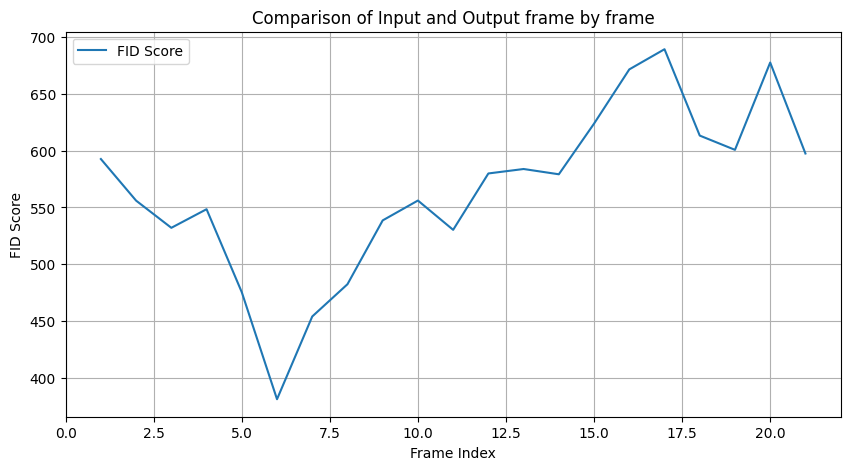

In [ ]:
# Create a list of frame indices
frame_indices = list(range(1, num_frames + 1))

# Create a graph of FID scores
plt.figure(figsize=(10, 5))
plt.plot(frame_indices, fid_scores, label='FID Score')
plt.xlabel('Frame Index')
plt.ylabel('FID Score')
plt.title('Comparison of Input and Output frame by frame')
plt.legend()
plt.grid(True)
plt.show()